In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering


## Load raw data

In [2]:
# load raw data (task a)
DATA_FOLDER = '/Users/michaelyan/Desktop/RSM338_A2'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print(raw.describe())


Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713
       Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [3]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


### Plot histogram

Note that distributions for GDP Growth is quite skewed.

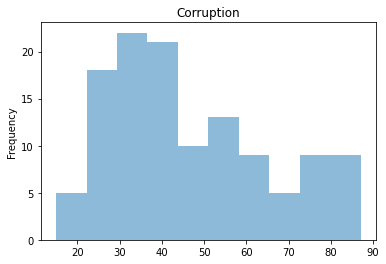

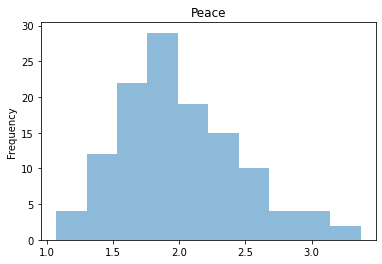

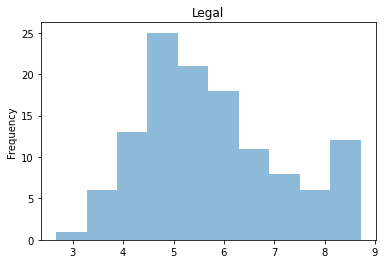

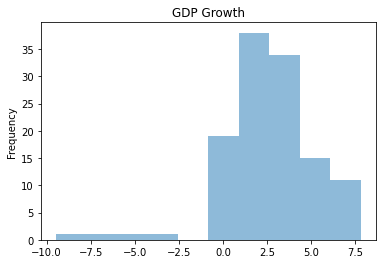

In [4]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [5]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std() #normalization of data
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

Text(0, 0.5, 'Inertia (within-cluster sum of squares)')

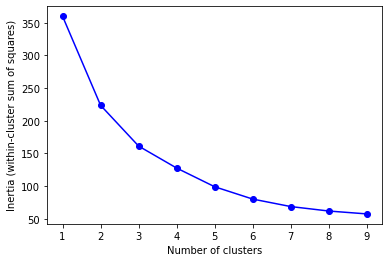

In [6]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]
n_init = [2,5,10,20,50,100]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')

In [7]:
# Task b: Search for KMeans using Google and look at the documentation. You will see that
# n_init is the number of times the algorithm is run with different initial cluster centers.
# The default value for n_init is 10. Try several different values of n_init (e.g, 2, 20, 50
# and 100) and see whether the countries in the high-risk cluster change. (1.5 pts)


#***This part of code is to create a table that contains the results***
result = []
for i in n_init:      #n_init = [2,10,50,100]
    kmeans = KMeans(n_clusters=3,n_init = i, random_state = 1).fit(X)
    y = kmeans.labels_
    data = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
    x = silhouette_score(X, y)
    result.append((i, tuple(sorted(kmeans.cluster_centers_,key=sum)[0].round(2)), len(data[data['Label']==0]), 
                   kmeans.inertia_,x))
#***End of Code***

#Visualization and display of results
resultdf = pd.DataFrame(result)
resultdf.columns = ['n_init', 'high-risk center(legal,peace,gdp)', '#high-risk countries', 'inertia','sil']
print(resultdf)

   n_init high-risk center(legal,peace,gdp)  #high-risk countries     inertia  \
0       2              (0.71, -0.96, -3.44)                    70  169.242429   
1       5               (1.22, -0.68, -0.9)                    26  161.255377   
2      10              (1.23, -0.83, -1.08)                    22  161.133387   
3      20              (1.23, -0.83, -1.08)                    22  161.133387   
4      50              (1.23, -0.83, -1.08)                    22  161.133387   
5     100              (1.23, -0.83, -1.08)                    22  161.133387   

        sil  
0  0.383368  
1  0.349713  
2  0.355852  
3  0.355852  
4  0.355852  
5  0.355852  


In [53]:
#Task c: Set n_init back to its default value of 10. Carry out k-means clustering for k=3 with all
#four features (corruption index, peace index, legal risk index, and GDP growth rate).
#Compare the countries that are in the high-risk cluster with those that are in the high
#risk cluster when only three features are used. (2.5 pts)


#***This part of code is to put the results in a dataframe***
newdata = raw[['Corruption', 'Peace', 'Legal', 'GDP Growth']]
newdata = (newdata - newdata.mean()) / newdata.std()
kmeans2 = KMeans(n_clusters=3, random_state=1).fit(newdata)
y2 = kmeans2.labels_
newdata['label'] = y2


print(kmeans2.cluster_centers_.round(2)) #Inspect which cluster center is the riskist
kmeans2result = pd.DataFrame({'High-risk cluster center': 
                              [tuple(np.array(sorted(kmeans2.cluster_centers_,key=sum)).round(decimals=2)[1])],
                             'High-risk countries': len(newdata[newdata['label'] == 1]),
                              'Silhouette Score': np.array(silhouette_score(newdata,y2)).round(decimals=2), 
                              'inertia' : np.array(kmeans2.inertia_).round(decimals=2)})
#***End of Code***


#display of answers
print(kmeans2result) #High-risk cluster center in be in the order of ['Corruption', 'Peace', 'Legal', 'GDP Growth']
print('Compared to the previous k-means result')
print(resultdf.iloc[2]) #High-risk cluster center with only three variables (for comparison purpose)




[[ 1.18 -0.9   1.12 -0.26]
 [-0.5   0.17 -0.48  0.59]
 [-0.88  1.23 -0.83 -1.08]]
    High-risk cluster center  High-risk countries  Silhouette Score  inertia
0  (-0.5, 0.17, -0.48, 0.59)                   58              0.42    194.4
Compared to the previous k-means result
n_init                                                 10
high-risk center(legal,peace,gdp)    (1.23, -0.83, -1.08)
#high-risk countries                                   22
inertia                                        161.133387
sil                                              0.355852
Name: 2, dtype: object


In [50]:
#Task d: A Python package, AgglomerativeClustering, for hierarchical clustering can be
#imported from sklearn.cluster to carry out hierarchical clustering. (Use instruction
#“from sklearn.cluster import AgglomerativeClustering”). Determine three clusters
#from the peace index, legal risk index, and GDP growth rate. Compare the countries
#that are in the high-risk cluster with those that are in the high-risk cluster 
#when the kmeans algorithm is used. Try different measures of closeness (referred to as “linkage”
#in the package). (3.5 pts)


#***Code for creating a dataframe to contain the answers for this question***
clusters = {} #Dictionary that contains the results of clustering, later modified into dataframe form
centers = pd.DataFrame() #First part of the task, determine low to high risk clusters (Different linkages)
unsorted_centers = pd.DataFrame()
for i in ['ward', 'average', 'complete', 'single']:
    cluster = AgglomerativeClustering(n_clusters = 3, linkage=i).fit(X)
    X['ylabels'] = cluster.labels_
    sil = silhouette_score(X, cluster.labels_)
    clusters[i] = (cluster, X, sil)
    lst = [] #from this part, the code generates the cluster centers (unsorted)
    for j in [0,1,2]:
        lst.append(list(np.array(X[X['ylabels']==j][['Peace', 'Legal', 'GDP Growth']].mean()).round(1)))
    centers[i]= sorted(lst, key=sum)
    unsorted_centers[i] = lst
    
centers['Risk-Level'] = ['high', 'medium', 'low']
# ***End of code for generating the results***


#***Code for creating the dataframe for linkage methods and high-risk clutsters***
result = pd.DataFrame() 
#***End of code for creating a the dataframe to contain the answers***

#***Manual code for creating results table
result['Method'] = ['ward', 'average', 'complete', 'single']
result['High-risk Center'] = [[1.6, -1.1, -1.2], [0.7, -1.0, -3.4], [0.7, -1.0, -3.4], [0.7, -1.0, -3.4]]
result['High-risk Label'] = [0, 1, 1, 2]

accumulator = []
for i in [0,1,2,3]:
    key = ['ward', 'average', 'complete', 'single'][i]
    label = [0, 1, 1, 2][i]
    data = clusters.get(key)[1]
    accumulator.append(len(data[data['ylabels']==label]))
result['no. High-risk Countries'] = accumulator

accumulator2 = []
for i in ['ward', 'average', 'complete', 'single']:
    silhouette = clusters.get(i)[2]
    accumulator2.append(silhouette)
result['Silhouette'] = accumulator2

#Display of answer: three clusters, high-risk cluster centers, & comaprison of previous k-means result
print(centers)
print(result) #result of high-risk clusters of the Agglomerative Cluster Method
#Performing comparison with Kmeans cluster results
print('''


      this is the results using kmeans clustering''')
print(resultdf) #pevious result of k-means clustering

                ward            average           complete             single  \
0  [1.6, -1.1, -1.2]  [0.7, -1.0, -3.4]  [0.7, -1.0, -3.4]  [0.7, -1.0, -3.4]   
1  [-1.0, 1.2, -0.2]   [-0.2, 0.2, 0.2]   [-0.2, 0.2, 0.2]   [-0.2, 0.2, 0.2]   
2   [0.1, -0.4, 0.4]  [2.0, -1.2, -0.3]  [2.0, -1.2, -0.3]  [2.0, -1.2, -0.3]   

  Risk-Level  
0       high  
1     medium  
2        low  
     Method   High-risk Center  High-risk Label  no. High-risk Countries  \
0      ward  [1.6, -1.1, -1.2]                0                      106   
1   average  [0.7, -1.0, -3.4]                1                       11   
2  complete  [0.7, -1.0, -3.4]                1                       11   
3    single  [0.7, -1.0, -3.4]                2                        4   

   Silhouette  
0    0.432110  
1    0.480695  
2    0.480695  
3    0.400857  



      this is the results using kmeans clustering
   n_init high-risk center(legal,peace,gdp)  #high-risk countries     inertia  \
0       2           

### Task e: Venezuela is not included in the 121 countries used in the country risk case study
# described in this chapter. Its feature values are extreme. The corruption index, peace
# index, legal risk index, and real GDP growth rate are 16, 2.671, 2.895, and −35%,
# respectively. Try adding Venezuela to the countries considered in the three-feature
# analysis considered in this section. How do the results change? What do your results
# suggest about the sensitivity of k-means to outliers? (2.5 pts)

#***Code for adding Venezuela into the dataset***
data2 = raw
data2.loc[(len(data2))] = ['Venezuela', 'VZ', 16, 2.671, 2.895, -35]
X2 = data2[['Peace', 'Legal', 'GDP Growth']]
X2 = (X2 - X2.mean()) / X2.std()
Xandlabels = X2
kmeans3 = KMeans(n_clusters = 3, random_state = 1).fit(X2)
ylabels3 = kmeans3.labels_
Xandlabels['ylabels'] = ylabels3
#***End of Code***

#Display of results
print(kmeans3.cluster_centers_.round(4)) #Highest risk is the second cluster where it is more negative
print(str(kmeans3.cluster_centers_[1]) + ' is the high risk cluster center with Venezuela')
print(str(kmeans.cluster_centers_[0]) + ' is the high risk cluster center without Venezuela')
print('Interia is ' + str(kmeans3.inertia_))
print('Silhouette Score is ' + str(silhouette_score(X2, ylabels3)))
print('Number of high risk countries/country is ' + str(len(Xandlabels[Xandlabels['ylabels']==1])))
raw = raw[0:121] # return things back to normal. data2 = raw changes the raw dataframe at the same time

### Visualize the result (3D plot)

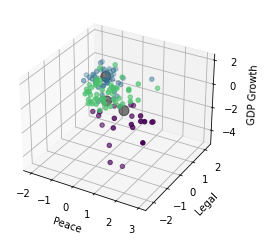

In [10]:
# Visaulize 3d result
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

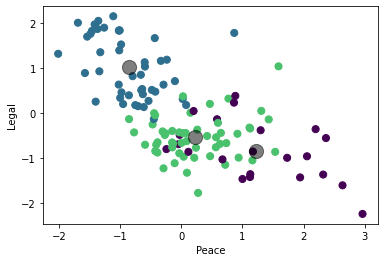

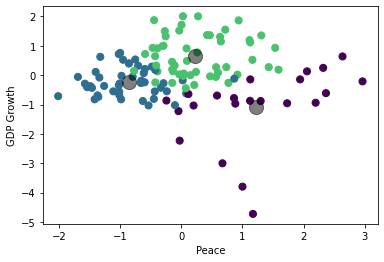

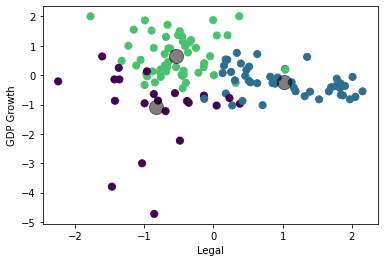

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

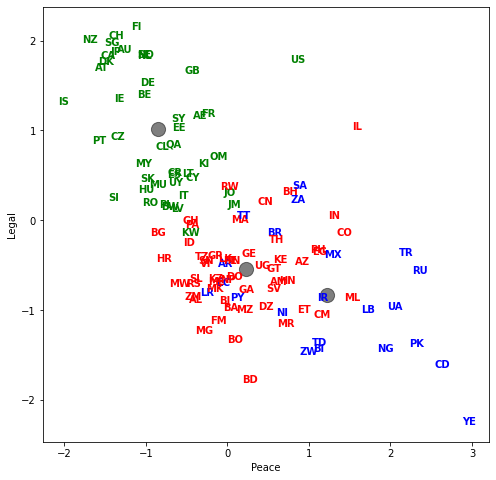

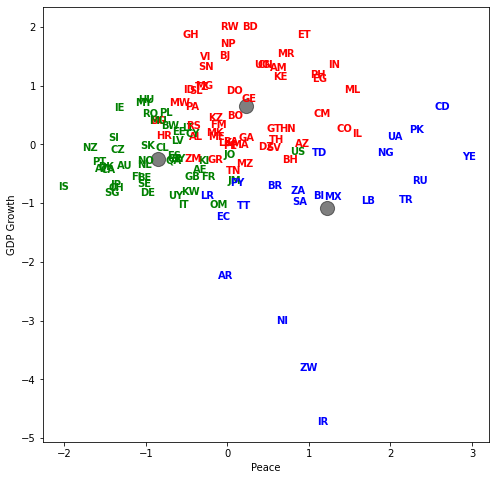

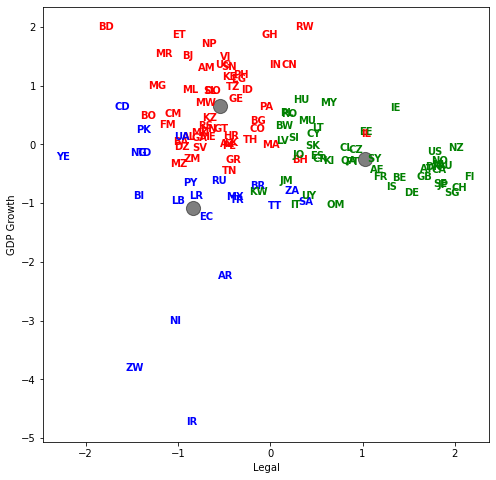

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [13]:
# Simply display of result, does not change anything
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))
    
# cluster point is additionally added


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

In [14]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.32464190972789125
For n_clusters= 3 The average silhouette_score is : 0.387610186974312
For n_clusters= 4 The average silhouette_score is : 0.4147106777086607
For n_clusters= 5 The average silhouette_score is : 0.3583726930081992
For n_clusters= 6 The average silhouette_score is : 0.36324519592916044
For n_clusters= 7 The average silhouette_score is : 0.36464339077767166
For n_clusters= 8 The average silhouette_score is : 0.3607716414673145
For n_clusters= 9 The average silhouette_score is : 0.34524632595675675
For n_clusters= 10 The average silhouette_score is : 0.35149340070240187
